In [245]:
import numpy as np
from scipy.integrate import Radau as RK

In [246]:
def geodesic(tau, y):
    """
    y[0] = t
    y[1] = dt
    y[2] = r
    y[3] = dr
    y[4] = phi
    y[5] = dphi
    y[6] = mass
    
    F[0] = dt
    F[1] = d^2t
    F[2] = dr
    F[3] = d^2r
    F[4] = dphi
    F[5] = d^2phi
    F[6] = mass change (0)
    """
    F = np.zeros_like(y, dtype=float)
    G = 1
    c = 1
    M = y[6]
    R = (2*G*M)/c**2
    F[0] = y[1]
    F[1] = -(R/((y[2]**2)*(1-(R/y[2]))))*y[3]*y[1]
    F[2] = y[3]
    F[3] = (y[2]-R)*y[5]**2 + (y[3]**2)*(R/((y[2]**2)*(1-(R/y[2])))) - ((G*M)/y[2]**2)*(1-(R/y[2]))*y[1]**2
    F[4] = y[5]
    F[5] = -(2/y[2])*y[3]*y[5]
    F[6] = 0
    
    return F

In [247]:
def initial_y(t,r,phi,m):
    y = np.zeros(shape = (7))
    G = 1
    c = 1
    dphi = np.sqrt((G*m)/r)
    y[0] = t
    y[1] = np.sqrt(c**2+((r**2)*(dphi**2)))
    y[2] = r
    y[3] = 0
    y[4] = phi
    y[5] = dphi
    y[6] = m
    return y

In [264]:
y = initial_y(0,10,0,1)
print(y)
#y = (0,2,1,0,0,1,1)
print(y)
runga = RK(fun = geodesic, t0 = 0, y0 = y, t_bound = 10, max_step = 0.1, first_step = 0.1, atol = 1e-12, rtol = 1e-12)
y_values = []
t_values = []
num = 0
while(1>0):
    # get solution step state
    runga.step()
    y_values.append(runga.y)
    print(runga.y)
    t_values.append(runga.t)
    # break loop after modeling is finished
    num+=1
    print(num)
    if runga.status == 'finished':
        break
print(y_values)
print(len(y_values))
print(t_values)

[ 0.          3.31662479 10.          0.          0.          0.31622777
  1.        ]
[ 0.          3.31662479 10.          0.          0.          0.31622777
  1.        ]
[3.23235103e-02 3.31662199e+00 1.00000338e+01 6.93906826e-03
 3.08191970e-03 3.16225627e-01 1.00000000e+00]
1
[6.46469659e-02 3.31661358e+00 1.00001353e+01 1.38780280e-02
 6.16379772e-03 3.16219212e-01 1.00000000e+00]
2
[9.69703122e-02 3.31659956e+00 1.00003043e+01 2.08167709e-02
 9.24559237e-03 3.16208520e-01 1.00000000e+00]
3
[ 0.12929349  3.31657994 10.00054101  0.02775519  0.01232726  0.31619355
  1.        ]
4
[ 0.16161646  3.31655471 10.00084532  0.03469317  0.01540876  0.31617431
  1.        ]
5
[ 0.19393915  3.31652388 10.00121724  0.04163061  0.01849006  0.31615079
  1.        ]
6
[ 0.22626151  3.31648745 10.00165677  0.0485674   0.0215711   0.31612301
  1.        ]
7
[ 0.25858349  3.31644542 10.00216391  0.05550344  0.02465186  0.31609095
  1.        ]
8
[ 0.29090504  3.31639779 10.00273863  0.0624386   0

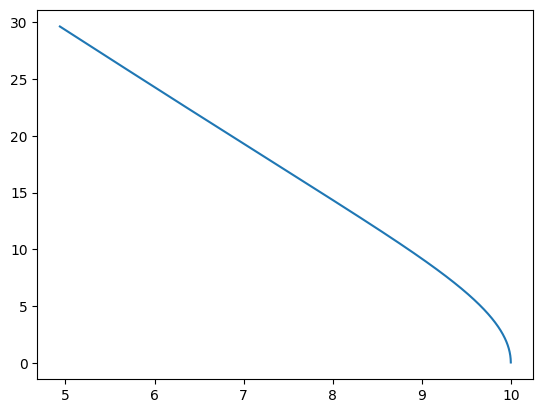

In [265]:
import matplotlib.pyplot as plt
y_values = np.array(y_values)
r = y_values[:,2]
phi = y_values[:,4]
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.plot(x,y)
